# Instructor Task
## Dataset
- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## 1. Read in the data

In [2]:
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv')

In [3]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
cols = ['id', 'diagnosis'] + ['f' + str(x) for x in range(30)]

In [5]:
df.columns = cols

In [6]:
df.head()

,id,diagnosis,f0,f1,f2,f3,f4,f5,f6,f7,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
df['diagnosis'].value_counts()

0    357
1    211
Name: diagnosis, dtype: int64

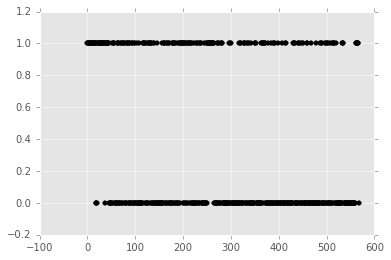

In [10]:
# check the distribution of M & Bs in the data
plt.scatter(df.index, df['diagnosis'], color='k')

## 2. Separate the data into feature and target.

In [45]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

## 3. Create and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

In [51]:
clf = LinearSVC(class_weight='balanced')

In [52]:
results = cross_val_score(clf, X, y, cv=5)

In [53]:
results

array([ 0.91304348,  0.90350877,  0.91150442,  0.92920354,  0.9380531 ])

In [54]:
# mean accuracy
results.mean()

0.91906266242751933

In [55]:
# standard deviation
np.std(results)

0.012639264667787406

## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=121)

In [17]:
model = clf.fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.99      0.92       117
          1       0.98      0.75      0.85        71

avg / total       0.91      0.90      0.90       188



In [20]:
confusion_matrix(y_test, y_pred)

array([[116,   1],
       [ 18,  53]])

## 5. Scale the data and see if that improves the score.

In [21]:
X_scaled = StandardScaler().fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=121)

In [23]:
model = clf.fit(X_train, y_train)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       117
          1       0.97      0.93      0.95        71

avg / total       0.96      0.96      0.96       188



In [26]:
confusion_matrix(y_test, y_pred)

array([[115,   2],
       [  5,  66]])

## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

### A: We are tuning the regularization parameter, C, of our model. Regularization is a method to ensure that we create a robust model rather than one that adheres too closely to each data point in our training set. We want to capture the signal, not the noise. As we decrease the value of C, we increase the penalty for over-specifying our model. In effect, we penalize model complexity -- as represented by the size of the feature coefficients -- by decreasing the value of C. 

In [27]:
clf = LogisticRegressionCV(Cs=[.0001, .001, .01, .1], class_weight='balanced', cv=5)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=121)

In [29]:
model = clf.fit(X_train, y_train)

In [30]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       117
          1       0.97      0.93      0.95        71

avg / total       0.96      0.96      0.96       188



In [31]:
confusion_matrix(y_test, y_pred)

array([[115,   2],
       [  5,  66]])

### Q: What was the best C?

In [32]:
# find the best C value from our model
model.C_

array([ 0.1])

## 7. Create Two Plots that describe the data and discuss your results

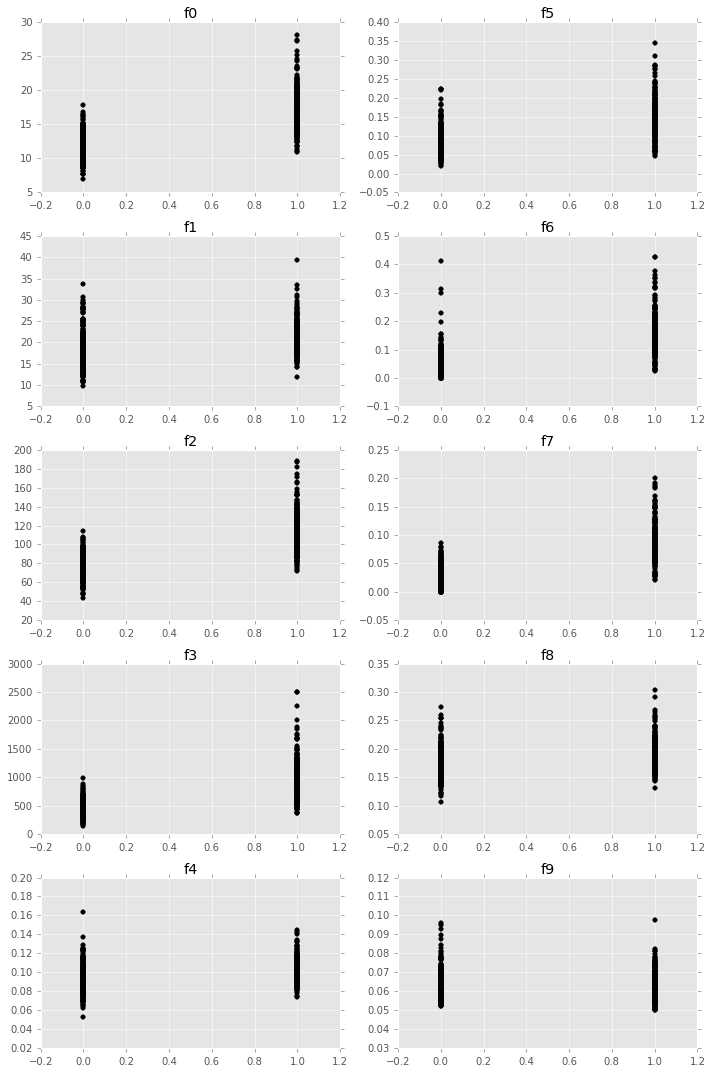

In [33]:
fig, ax = plt.subplots(5,2, figsize=(10,15))

ax[0,0].scatter(df['diagnosis'], df['f0'], color='k')
ax[0,0].set_title('f0')

ax[1,0].scatter(df['diagnosis'], df['f1'], color='k')
ax[1,0].set_title('f1')

ax[2,0].scatter(df['diagnosis'], df['f2'], color='k')
ax[2,0].set_title('f2')

ax[3,0].scatter(df['diagnosis'], df['f3'], color='k')
ax[3,0].set_title('f3')

ax[4,0].scatter(df['diagnosis'], df['f4'], color='k')
ax[4,0].set_title('f4')

ax[0,1].scatter(df['diagnosis'], df['f5'], color='k')
ax[0,1].set_title('f5')

ax[1,1].scatter(df['diagnosis'], df['f6'], color='k')
ax[1,1].set_title('f6')

ax[2,1].scatter(df['diagnosis'], df['f7'], color='k')
ax[2,1].set_title('f7')

ax[3,1].scatter(df['diagnosis'], df['f8'], color='k')
ax[3,1].set_title('f8')

ax[4,1].scatter(df['diagnosis'], df['f9'], color='k')
ax[4,1].set_title('f9')

plt.tight_layout()

### From the above graphs of the ten mean attribute measures (#3-12), we can see that there are clear distinctions for several variables between the malignant and benign cells. Specifically, feature numbers 0, 2, 3, and 7.

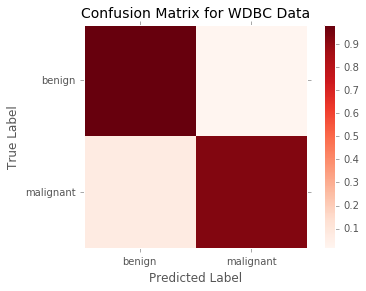

In [34]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Reds)
plt.colorbar()
labels = ['benign','malignant']
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
ax.grid(False)
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title('Confusion Matrix for WDBC Data', y=1.01, fontsize=14)

### The above figure is a confusion matrix for our final model (LogisticRegressionCV). We can see we have very low false positive rate, identifying 115 out of 117 benign cells correctly (2 false positives). Additionally, we can see that our false negative rate was also fairly low, as we identified 66 of 71 cases correctly (5 missed malignancies).

## 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

### Non-Technical: In this exercise, we built and evaluated a predictive model able to determine with high accuracy if a cell is benign or malignant using only those characteristics of the cell taken from medical imaging.

### Technical: Using the set of real-valued attributes of cell nuclei taken from medical imaging, we have trained and tested a number of models able to discriminate benign from malignant cells. In the first model, we used a linear support vector machine on raw/unprocessed feature values. The model was evaluated using 5-fold cross validation. The data was then split into a training (2/3) and test set (1/3). A classification report was generated, as well as a confusion matrix. The mean f1-score for the two classes was .90. The data was then centered and scaled using the StandardScaler of scikit-learn. Mean f1-score for the classes improved reaching a value of .96. Finally, another model was trained and tested. This model employed a logistic regression classifier with 5-fold cross-validation grid search to optimize the regularization parameter, C. The results of this final model were identical to the SVC model described above. Grid search results indicated that the use of C=0.1 was optimal.